In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

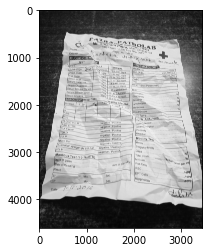

In [2]:
image_data="E:/Datasets/opencvImage/gg.jpg"
img = rgb2gray(imread(image_data))
plt.imshow(img, cmap="gray")

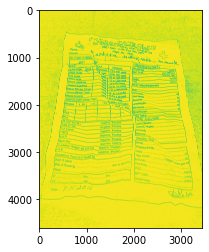

In [3]:
from skimage.filters import sobel
from skimage.util import invert

sobel_image = invert(sobel(img))
plt.imshow(sobel_image)

In [4]:
import numpy as np
from skimage.transform import rotate

#find the horizontal projection of all the rows in the image
#rotate the image between angles -10 to 10 degrees and find the angle which gives the least median of horizontal projection
def horizontal_projections(sobel_image):
    sum_of_cols = []
    rows,cols = sobel_image.shape
    for row in range(rows-1):
        sum_of_cols.append(np.sum(sobel_image[row,:]))
    return sum_of_cols

In [ ]:
fig, ax = plt.subplots(nrows=20, figsize=(20,50))
for index,angle in enumerate(range(-10,10)):
    ax[index].set_title('angle:'+str(angle))
    hp = horizontal_projections(rotate(sobel_image, angle, cval=1))
    xv = []
    yv = []
    for i, y in enumerate(hp):
        xv.append(i)
        yv.append(y)
        ax[index].plot(yv)

In [ ]:
rows,cols = sobel_image.shape
predicted_angle = 0
highest_hp = 0
for index,angle in enumerate(range(-10,10)):
    hp = horizontal_projections(rotate(sobel_image, angle, cval=1))
    median_hp = np.median(hp)
    if highest_hp < median_hp:
        predicted_angle = angle
        highest_hp = median_hp
  

fig,ax = plt.subplots(ncols=2, figsize=(20,10))
ax[0].set_title('original image grayscale')
ax[0].imshow(img, cmap="gray")
ax[1].set_title('original image rotated by angle'+str(predicted_angle))
ax[1].imshow(rotate(img, predicted_angle, cval=1), cmap="gray")